In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")
#from google.colab import drive
#drive.mount('/content/gdrive')

In [19]:
import os
import pandas as pd
from PIL import Image

root_dir = r"C:\Users\tanuja\Downloads\archiveeee\content\ISL_Dataset\Indian"

# Maximum number of images to load from each subdir_path
max_images_per_subdir = 500

# Initialize a list to store the image data
image_data = []

# Iterate through the subdirectories in the root directory
for label in os.listdir(root_dir):
    if not label.isdigit():
        subdir_path = os.path.join(root_dir, label)
        images = []

        for i, file in enumerate(os.listdir(subdir_path)):
            if i >= max_images_per_subdir:
                break
            file_path = os.path.join(subdir_path, file)

            try:
                with Image.open(file_path) as img:
                    img = img.convert("RGB")  # Load image fully and close the file
                    images.append({'label': label, 'color_image': img})

            except Exception as e:
                print(f"Error loading {file_path}: {e}")

        image_data.extend(images)

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)


In [20]:
root_dir_test = r"C:\Users\tanuja\OneDrive\Desktop\AI PROJECTS\HACKATHON\testing pictures"

# Maximum number of images to load from each subdir_path
max_images_per_subdir_test = 500

# Initialize a list to store the image data
image_data_test = []

# Iterate through the subdirectories in the root directory
for label in os.listdir(root_dir_test):
    # Check if the subdirectory is numeric
    if not label.isdigit():
        # Get the path to the subdirectory
        subdir_path_test = os.path.join(root_dir_test, label)

        # Use list comprehension to load a maximum images
        images_test = [
            {'label': label, 'color_image': Image.open(os.path.join(subdir_path_test, file))}
            for i, file in enumerate(os.listdir(subdir_path_test))
            if i < max_images_per_subdir_test
        ]
        # Extend the image_data list with the loaded images
        image_data_test.extend(images_test)

        # Check if the maximum number of images has been reached
        if len(images_test) == max_images_per_subdir_test:
            continue

# Create a DataFrame from the image data
df_test = pd.DataFrame(image_data_test)

In [21]:
if image_data:
    df = pd.DataFrame(image_data)
else:
    print("No images were loaded. Check file paths and formats.")

In [22]:
import pandas as pd

In [23]:
df

,label,color_image
0,A,<PIL.Image.Image image mode=RGB size=128x128 a...
1,A,<PIL.Image.Image image mode=RGB size=128x128 a...
2,A,<PIL.Image.Image image mode=RGB size=128x128 a...
3,A,<PIL.Image.Image image mode=RGB size=128x128 a...
4,A,<PIL.Image.Image image mode=RGB size=128x128 a...
...,...,...
12995,Z,<PIL.Image.Image image mode=RGB size=128x128 a...
12996,Z,<PIL.Image.Image image mode=RGB size=128x128 a...
12997,Z,<PIL.Image.Image image mode=RGB size=128x128 a...
12998,Z,<PIL.Image.Image image mode=RGB size=128x128 a...


In [24]:
df_test

,label,color_image
0,A,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,A,<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,A,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,A,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,A,<PIL.PngImagePlugin.PngImageFile image mode=RG...
...,...,...
3388,Z,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3389,Z,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3390,Z,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3391,Z,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [25]:
df['label'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [26]:
df_test['label'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

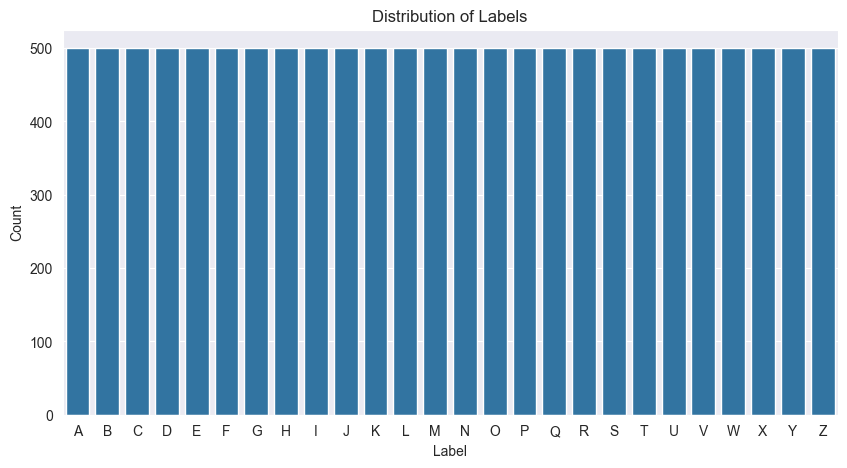

In [27]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.countplot(data=df,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

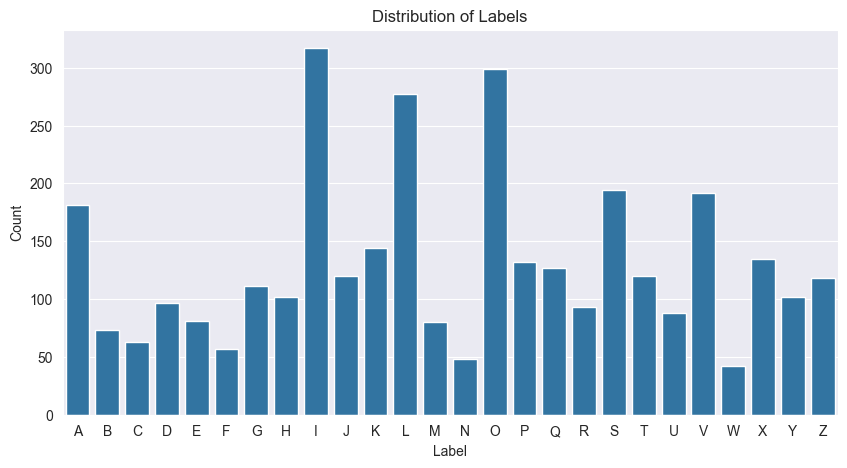

In [28]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.countplot(data=df_test,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

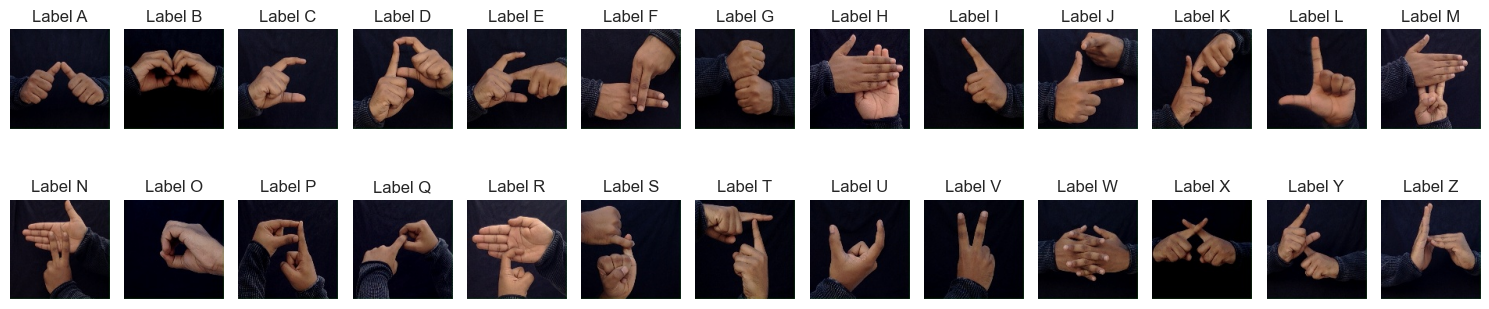

In [29]:
fig, axs = plt.subplots(2,13, figsize=(15, 4))

for i, (label, image) in enumerate(df.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax = axs[i // 13, i % 13]
    ax.imshow(image)
    ax.set_title('Label {}'.format(label))
    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

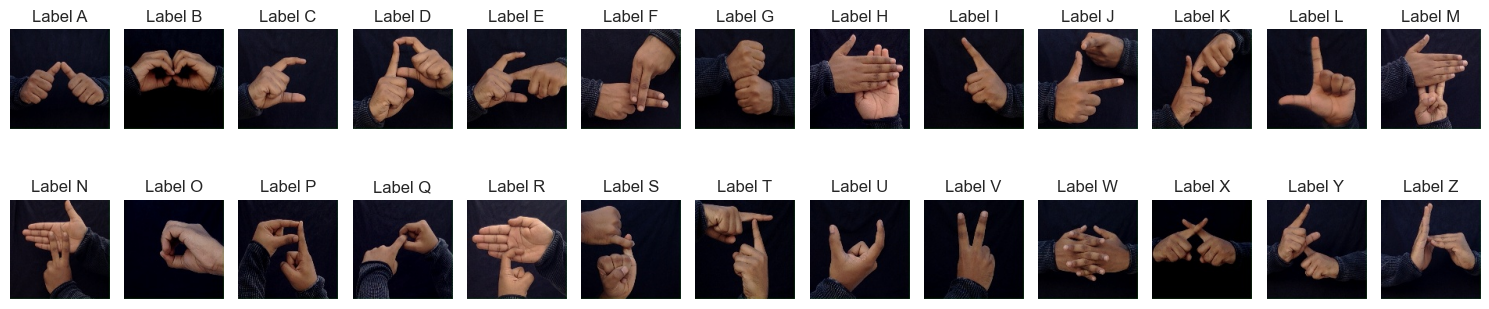

In [42]:
fig, axs = plt.subplots(2,13, figsize=(15, 4))

for i, (label_test, image_test) in enumerate(df.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax_test = axs[i // 13, i % 13]
    ax_test.imshow(image_test)
    ax_test.set_title('Label {}'.format(label_test))
    ax_test.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

In [44]:
# Preprocessing steps
#images = np.array(df['color_image'].tolist())
#labels = np.array(df['label'])

In [45]:
images = df['color_image'].to_numpy()
labels = df['label'].to_numpy()

In [46]:
images_test = df_test['color_image'].to_numpy()
labels_test = df_test['label'].to_numpy()

In [47]:
# Resize images to desired dimensions
resized_images = []
for image in images:
    resized_image = image.resize((32, 32))  # Resize the image to the desired size
    resized_images.append(np.array(resized_image))
images = np.array(resized_images)

In [48]:
# Resize images to desired dimensions
resized_images_test = []
for image in images_test:
    resized_image_test = image.resize((32, 32))  # Resize the image to the desired size
    resized_images_test.append(np.array(resized_image_test))
images_test = np.array(resized_images)

In [49]:
# Normalize pixel values
images = images / 255.0

In [50]:
# Normalize pixel values
images_test = images_test / 255.0

In [51]:
# Map labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [52]:
import pickle
# Save the label encoder to a file
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

print("Label encoder saved successfully!")

Label encoder saved successfully!


In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [54]:
# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=26, activation='softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 75)          │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │          13,338 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,425 (1.02 MB)

 Trainable params: 266,125 (1.02 MB)

 Non-trainable params: 300 (1.17 KB)

In [56]:
plot_model(model, to_file='model_architecture2.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [57]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [58]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.001)
history = model.fit(datagen.flow(X_train,y_train), epochs=25, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 39s 112ms/step - accuracy: 0.6729 - loss: 1.2900 - val_accuracy: 0.5335 - val_loss: 2.1473 - learning_rate: 0.0100
Epoch 2/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 33s 103ms/step - accuracy: 0.9897 - loss: 0.0719 - val_accuracy: 0.9992 - val_loss: 0.0298 - learning_rate: 0.0100
Epoch 3/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 33s 102ms/step - accuracy: 0.9941 - loss: 0.0367 - val_accuracy: 1.0000 - val_loss: 0.0048 - learning_rate: 0.0100
Epoch 4/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 34s 105ms/step - accuracy: 0.9964 - loss: 0.0237 - val_accuracy: 1.0000 - val_loss: 0.0026 - learning_rate: 0.0100
Epoch 5/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 34s 105ms/step - accuracy: 0.9986 - loss: 0.0154 - val_accuracy: 1.0000 - val_loss: 0.0013 - learning_rate: 0.0100
Epoch 6/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 34s 104ms/step - accuracy: 0.9978 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 7.0464e-04 - learning_rate: 0.0100
Epoch 7/25
325/325 ━━━━━━━━━━━━━━━━━━━━ 33s 103ms/step - accuracy:

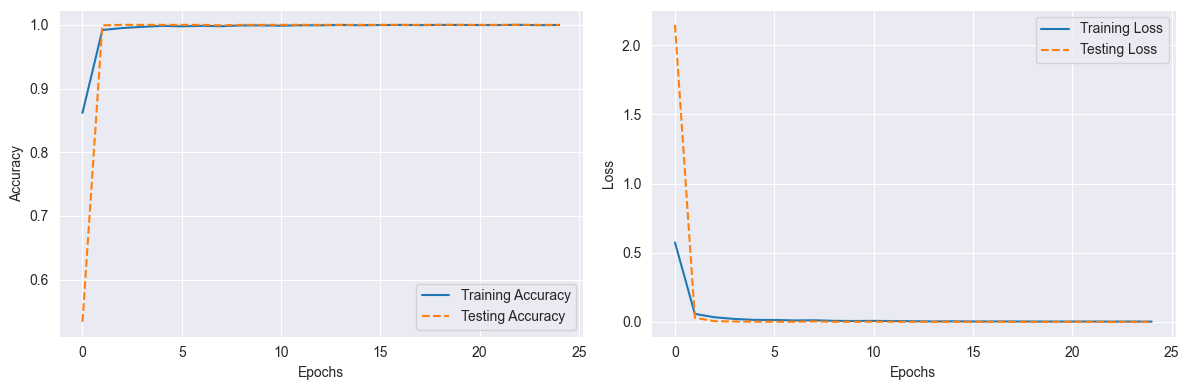

In [59]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [60]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


In [61]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [62]:
cm

array([[113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  91,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  99,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 113,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

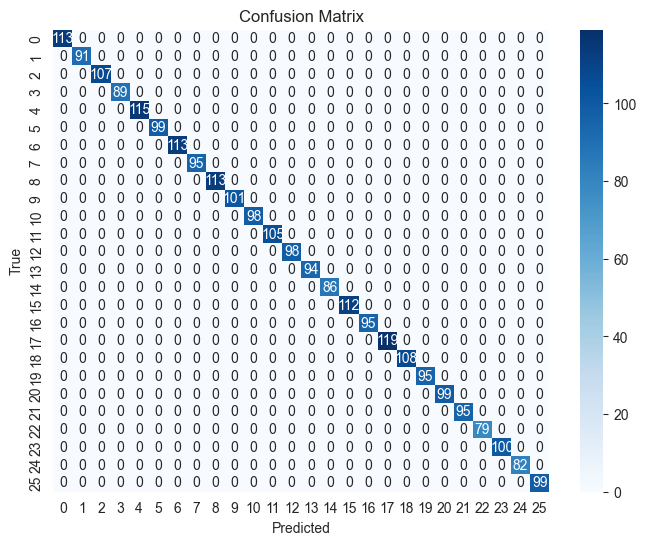

In [63]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('my_model.keras')

In [65]:
model = tf.keras.models.load_model("my_model.keras")

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import tkinter as tk
from tkinter import filedialog
import pickle
import os

# Load the trained model
model = tf.keras.models.load_model("my_model.keras")

In [72]:
# Load the label encoder used during training
label_encoder_path = "label_encoder.pkl"
if os.path.exists(label_encoder_path):
    with open(label_encoder_path, "rb") as file:
        label_encoder = pickle.load(file)
else:
    print("Warning: Label encoder file not found. Ensure you have saved 'label_encoder.pkl'.")
    label_encoder = None

In [73]:
import os  # Import os module
import pickle  # Import pickle for loading the label encoder

# Load the label encoder used during training
label_encoder_path = "label_encoder.pkl"

if os.path.exists(label_encoder_path):
    with open(label_encoder_path, "rb") as file:
        label_encoder = pickle.load(file)
else:
    print("Warning: Label encoder file not found. Ensure you have saved 'label_encoder.pkl'.")
    label_encoder = None


In [74]:
from tensorflow.keras.models import load_model

# Load the trained model
model_path = r"C:\Users\tanuja\my_model.keras"  # Change this to the correct path
model = load_model(model_path)


In [75]:
if model is None:
    print("Error: Model failed to load.")
else:
    print("Model loaded successfully!")


Model loaded successfully!


✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


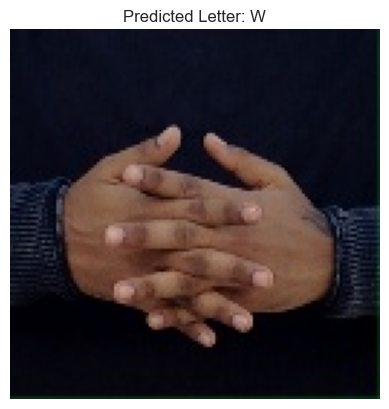

Predicted label: W


In [76]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import os
import pyttsx3  # Import text-to-speech library

# Load the trained model
model_path = r"C:\Users\tanuja\my_model.keras"  # Change to the correct model path

if os.path.exists(model_path):
    model = load_model(model_path)
    print("✅ Model loaded successfully!")
else:
    model = None
    print("❌ Error: Model file not found!")

# Check if model is loaded
if model is None:
    raise ValueError("Model is not loaded. Please check the file path and try again.")

# Function for text-to-speech
def text_to_speech_offline(text):
    engine = pyttsx3.init()
    engine.setProperty('rate', 150)  # Adjust speech speed
    engine.say(text)
    engine.runAndWait()

# Function to upload and classify an image
def classify_image():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
    
    if not file_path:
        print("No file selected!")
        return
    
    # Load and preprocess the image
    image = Image.open(file_path)
    image = image.resize((32, 32))  # Resize to match model input
    image = img_to_array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Expand dimensions for model input
    
    # Predict the label
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction, axis=1)
    
    # Check if label encoder is available
    if 'label_encoder' in globals() and label_encoder:
        label_name = label_encoder.inverse_transform(predicted_label)[0]
    else:
        label_name = f"Class {predicted_label[0]} (Label encoder missing)"
    
    # Display the image and predicted label
    plt.imshow(Image.open(file_path))
    plt.title(f"Predicted Letter: {label_name}")
    plt.axis("off")
    plt.show()
    
    print(f"Predicted label: {label_name}")
    
    # Speak the predicted label
    text_to_speech_offline(f"The predicted letter is {label_name}")

# Run the function to classify an uploaded image
classify_image()
